In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
init_notebook_mode(connected=True) 

In [ ]:
# maybe try to just download the newest files in the notebook and if that fails (try-except) use 
# the downloaded files from the folder

In [264]:
world_total = pd.read_csv('data/csse_covid_19_daily_reports/07-27-2020.csv')

Field description

    FIPS: US only. Federal Information Processing Standards code that uniquely identifies counties within the USA.
    Admin2: County name. US only.
    
    Province_State: Province, state or dependency name.
    
    Country_Region: Country, region or sovereignty name. The names of locations included on the Website correspond with the official designations used by the U.S. Department of State.
    
    Last Update: MM/DD/YYYY HH:mm:ss (24 hour format, in UTC).
    
    Lat and Long_: Dot locations on the dashboard. All points (except for Australia) shown on the map are based on geographic centroids, and are not representative of a specific address, building or any location at a spatial scale finer than a province/state. Australian dots are located at the centroid of the largest city in each state.
    
    Confirmed: Counts include confirmed and probable (where reported).
    
    
    Deaths: Counts include confirmed and probable (where reported).
    Recovered: Recovered cases are estimates based on local media reports, and state and local reporting when available, and therefore may be substantially lower than the true number. US state-level recovered cases are from COVID Tracking Project.
    
    Active: Active cases = total cases - total recovered - total deaths.
    
    Incidence_Rate: Incidence Rate = cases per 100,000 persons.
    
    Case-Fatality Ratio (%): Case-Fatality Ratio (%) = Number recorded deaths / Number cases.


In [591]:
world_total.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-07-28 04:58:43,34.223334,-82.461707,272,4,0,268.0,"Abbeville, South Carolina, US",1108.981938,1.470588
1,22001.0,Acadia,Louisiana,US,2020-07-28 04:58:43,30.295065,-92.414197,2215,63,0,2152.0,"Acadia, Louisiana, US",3569.989524,2.844244
2,51001.0,Accomack,Virginia,US,2020-07-28 04:58:43,37.767072,-75.632346,1065,15,0,1050.0,"Accomack, Virginia, US",3295.581136,1.408451
3,16001.0,Ada,Idaho,US,2020-07-28 04:58:43,43.452658,-116.241552,7203,47,0,7156.0,"Ada, Idaho, US",1495.679908,0.652506
4,19001.0,Adair,Iowa,US,2020-07-28 04:58:43,41.330756,-94.471059,20,0,0,20.0,"Adair, Iowa, US",279.642058,0.000000


In [109]:
world_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3931 entries, 0 to 3930
Data columns (total 14 columns):
FIPS                   3236 non-null float64
Admin2                 3241 non-null object
Province_State         3763 non-null object
Country_Region         3931 non-null object
Last_Update            3931 non-null object
Lat                    3853 non-null float64
Long_                  3853 non-null float64
Confirmed              3931 non-null int64
Deaths                 3931 non-null int64
Recovered              3931 non-null int64
Active                 3928 non-null float64
Combined_Key           3931 non-null object
Incidence_Rate         3853 non-null float64
Case-Fatality_Ratio    3880 non-null float64
dtypes: float64(6), int64(3), object(5)
memory usage: 430.1+ KB


In [ ]:
# clean up the data 
# make world choropleth map (maybe also in separate continents)
# possibly try to make an animated map changing over time (probably from the time series file)

In [597]:
# data for choropleth world map
world_sum = world_total[['Country_Region','Confirmed','Deaths','Recovered','Active']]
world_sum = world_sum.groupby('Country_Region').sum()
world_sum['Case-Fatality_Ratio'] = round((world_sum['Deaths']/world_sum['Confirmed'])*100,2)

In [600]:
world_sum

,Confirmed,Deaths,Recovered,Active,Case-Fatality_Ratio
Country_Region,,,,,
Afghanistan,36263,1269,25198,9796.0,3.50
Albania,4880,144,2745,1991.0,2.95
Algeria,27973,1163,18837,7973.0,4.16
Andorra,907,52,803,52.0,5.73
Angola,950,41,242,667.0,4.32
...,...,...,...,...,...
West Bank and Gaza,10621,78,3752,6791.0,0.73
Western Sahara,10,1,8,1.0,10.00
Yemen,1691,483,833,375.0,28.56


In [614]:
data = dict(type = 'choropleth',
            locations = world_sum.index,
            locationmode = 'country names',
            colorscale= 'reds',
            text= world_sum['Confirmed'],
            z=world_sum['Case-Fatality_Ratio'],
            colorbar = {'title':'Confirmed cases per 100k around the world'})

In [615]:
layout = dict(geo = {'scope':'world'})

In [616]:
choromap = go.Figure(data = [data],layout = layout)

In [ ]:
# map of the case fatality ratio (%)

In [617]:
iplot(choromap)

In [254]:
europe = ['Portugal','Spain','Iceland','Ireland','United Kingdom','France','Belgium','Netherlands','Italy',
          'Germany','Switzerland','Austria','Denmark','Norway','Sweden','Finland','Russia','Estonia','Latvia',
         'Lithuania','Poland','Belarus','Czechia','Ukraine','Moldova','Romania','SLovakia','Hungary','Slovenia',
         'Croatia','Bosnia and Herzegovina','Montenegro','Albania','Serbia','Bulgaria','North Macedonia','Greece']

In [395]:
europe_sum = world_total[['Country_Region','Confirmed','Deaths','Recovered','Active']]

In [278]:
europe_sum = europe_sum[europe_sum['Country_Region'].isin(europe)].groupby('Country_Region').sum()

In [394]:
europe_sum

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Albania,4880,144,2745,1991.0
Austria,20558,713,18246,1599.0
Belarus,67251,538,60492,6221.0
Belgium,66428,9822,17452,39154.0
Bosnia and Herzegovina,10498,294,4930,5274.0
Bulgaria,10621,347,5585,4689.0
Croatia,4881,139,3936,806.0
Czechia,15516,373,11428,3715.0
Denmark,13775,613,12618,544.0


In [286]:
data = dict(type = 'choropleth',
            locations = europe_sum.index,
            locationmode = 'country names',
            colorscale= 'reds',
            text= europe_sum['Confirmed'],
            z=europe_sum['Confirmed'],
            colorbar = {'title':'Confirmed cases per 100k in Europe'})

One of the following named colorscales:
            ['aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance',
             'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg',
             'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl',
             'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric',
             'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
             'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
             'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
             'orrd', 'oryel', 'peach', 'phase', 'picnic', 'pinkyl', 'piyg',
             'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn', 'puor',
             'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu', 'rdgy',
             'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar', 'spectral',
             'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn', 'tealrose',
             'tempo', 'temps', 'thermal', 'tropic', 'turbid', 'twilight',
             'viridis', 'ylgn', 'ylgnbu', 'ylorbr', 'ylorrd'].
        Appending '_r' to a named colorscale reverses it.

In [281]:
layout = dict(geo = {'scope':'europe'})

In [287]:
choromap = go.Figure(data = [data],layout = layout)

In [288]:
iplot(choromap)

In [5]:
USA_total = pd.read_csv('data/csse_covid_19_daily_reports_us/07-27-2020.csv')

Field description

    Province_State - The name of the State within the USA.
    
    Country_Region - The name of the Country (US).
    
    Last_Update - The most recent date the file was pushed.
    
    Lat - Latitude.
    
    Long_ - Longitude.
    
    Confirmed - Aggregated case count for the state.
    
    Deaths - Aggregated death toll for the state.
    
    Recovered - Aggregated Recovered case count for the state.
    
    Active - Aggregated confirmed cases that have not been resolved (Active cases = total cases - total recovered - total deaths).
    
    FIPS - Federal Information Processing Standards code that uniquely identifies counties within the USA.
    
    Incident_Rate - cases per 100,000 persons.
    
    People_Tested - Total number of people who have been tested.
    
    People_Hospitalized - Total number of people hospitalized.
    
    Mortality_Rate - Number recorded deaths * 100/ Number confirmed cases.
    
    UID - Unique Identifier for each row entry.
    
    
    ISO3 - Officialy assigned country code identifiers.
    
    Testing_Rate - Total test results per 100,000 persons. The "total test results" are equal to "Total test results (Positive + Negative)" from COVID Tracking Project.
    
    Hospitalization_Rate - US Hospitalization Rate (%): = Total number hospitalized / Number cases. The "Total number hospitalized" is the "Hospitalized – Cumulative" count from COVID Tracking Project. The "hospitalization rate" and "Total number hospitalized" is only presented for those states which provide cumulative hospital data.


In [82]:
state_abbrev = pd.read_csv('data/state_abbrev.csv')

In [83]:
state_abbrev.head(5)

,Province_State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,American Samoa,Samoa,AS
3,Arizona,Ariz.,AZ
4,Arkansas,Ark.,AR


In [31]:
# dropping cruise ships diamond princess and grand princess
USA_only = USA_total.drop([9,13]).reset_index()

In [67]:
state_abbrev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
Province_State""    56 non-null object
Abbrev""            56 non-null object
Code""              56 non-null object
dtypes: object(3)
memory usage: 1.4+ KB


In [85]:
USA_only = pd.concat([USA_only.set_index('Province_State'),state_abbrev.set_index('Province_State')['Code']],axis=1, join='inner').reset_index()

In [86]:
USA_only.head()

,Province_State,index,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Code
0,Alabama,0,US,2020-07-28 04:59:02,32.3182,-86.9023,81115,1491,32510.0,47114.0,1,1654.332847,657959.0,9694.0,1.838131,84000001,USA,13419.012336,11.950934,AL
1,Alaska,1,US,2020-07-28 04:59:02,61.3707,-152.4044,2623,21,817.0,1785.0,2,358.556206,207368.0,NaN,0.800610,84000002,USA,28346.581550,NaN,AK
2,American Samoa,2,US,2020-07-28 04:59:02,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,1037.0,NaN,NaN,16,ASM,1863.733578,NaN,AS
3,Arizona,3,US,2020-07-28 04:59:02,33.7298,-111.4312,163827,3304,21321.0,139202.0,4,2250.767546,878333.0,7751.0,2.016762,84000004,USA,12067.140404,4.731210,AZ
4,Arkansas,4,US,2020-07-28 04:59:02,34.9697,-92.3731,39447,408,32365.0,6674.0,5,1307.142545,484891.0,2624.0,1.034299,84000005,USA,16067.677026,6.651963,AR


In [290]:
# have to map the abbreviation of state names to the full names in a new column
data = dict(type = 'choropleth',
            locations = USA_only['Code'],
            locationmode = 'USA-states',
            colorscale= 'reds',
            text= USA_only['FIPS'],
            z=USA_only['Confirmed'],
            colorbar = {'title':'Confirmed cases'})

In [291]:
layout = dict(geo = {'scope':'usa'})

In [292]:
choromap = go.Figure(data = [data],layout = layout)

In [293]:
iplot(choromap)

In [387]:
# top 20 for confirmed cases
top10 = world_sum.sort_values('Confirmed',ascending=False).head(10)

In [289]:
# make line and area plots from time series for top 10 countries
# change column names with dates into one column of datetime objects

In [389]:
countries = top10.index

In [401]:
countries

Index(['US', 'Brazil', 'India', 'Russia', 'South Africa', 'Mexico', 'Peru',
       'Chile', 'United Kingdom', 'Iran'],
      dtype='object', name='Country_Region')

In [531]:
def process_time_series(time_series):
    time_series.drop(['Province/State','Lat','Long'], axis=1, inplace=True)
    top10 = time_series[time_series['Country/Region'].isin(countries)].groupby('Country/Region').sum()
    top10.sort_index(inplace=True)
    return top10

In [533]:
ts_confirmed = pd.read_csv('data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
ts_deaths = pd.read_csv('data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
ts_recovered = pd.read_csv('data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

top10_confirmed = process_time_series(ts_confirmed)
top10_deaths = process_time_series(ts_deaths)
top10_recovered = process_time_series(ts_recovered)

In [522]:
def extract_country_data(name,ts_confirmed,ts_deaths,ts_recovered):
    
    confirmed = pd.DataFrame(ts_confirmed.loc[name])
    #confirmed.drop(['Province/State','Country/Region','Lat','Long'], axis=1, inplace=True)
    confirmed.index = pd.to_datetime(confirmed.index)
    confirmed.columns = ['Confirmed']
    
    deaths = pd.DataFrame(ts_deaths.loc[name])
    #deaths.drop(['Province/State','Country/Region','Lat','Long'], axis=1, inplace=True)
    deaths.index = pd.to_datetime(deaths.index)
    deaths.columns = ['Deaths']
    
    recovered = pd.DataFrame(ts_recovered.loc[name])
    #recovered.drop(['Province/State','Country/Region','Lat','Long'], axis=1, inplace=True)
    recovered.index = pd.to_datetime(recovered.index)
    recovered.columns = ['Recovered']
    
    concatenated = pd.concat([confirmed,recovered,deaths],axis=1)
    return concatenated

In [430]:
#top10_confirmed,top10_deaths,top10_recovered

In [519]:
import matplotlib.ticker as ticker

In [535]:
top10_total_data = []

for country in countries:
    top10_total_data.append((country,extract_country_data(country,top10_confirmed,top10_deaths,top10_recovered)))

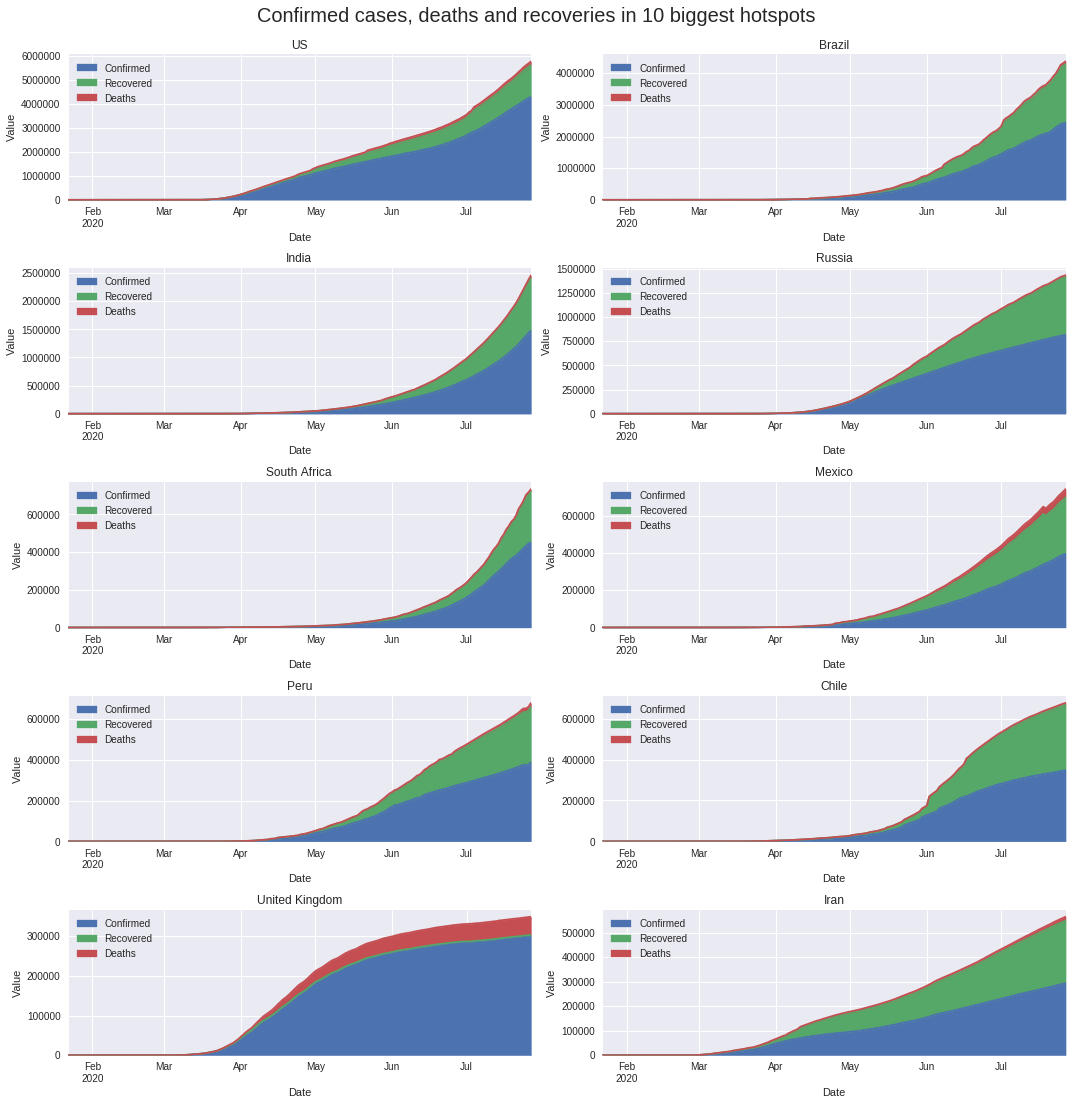

In [536]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(15,15))
plt.suptitle('Confirmed cases, deaths and recoveries in 10 biggest hotspots', fontsize=20,y=1.02)

for i in range(0,10):
    ax = fig.add_subplot(5,2,i+1)
    plt.title(top10_total_data[i][0])
    plt.xlabel('Date')
    plt.ylabel('Value')
    top10_total_data[i][1].plot(kind='area',ax=ax)
    
plt.tight_layout()

In [541]:
top10

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
US,4290259,148011,1325804,2865708.0
Brazil,2442375,87618,1846641,508116.0
India,1480073,33408,951166,495499.0
Russia,816680,13334,602249,201097.0
South Africa,452529,7067,274925,170537.0
Mexico,395489,44022,303810,47657.0
Peru,389717,18418,272547,98752.0
Chile,347923,9187,319954,18782.0
United Kingdom,301708,45844,1437,254427.0


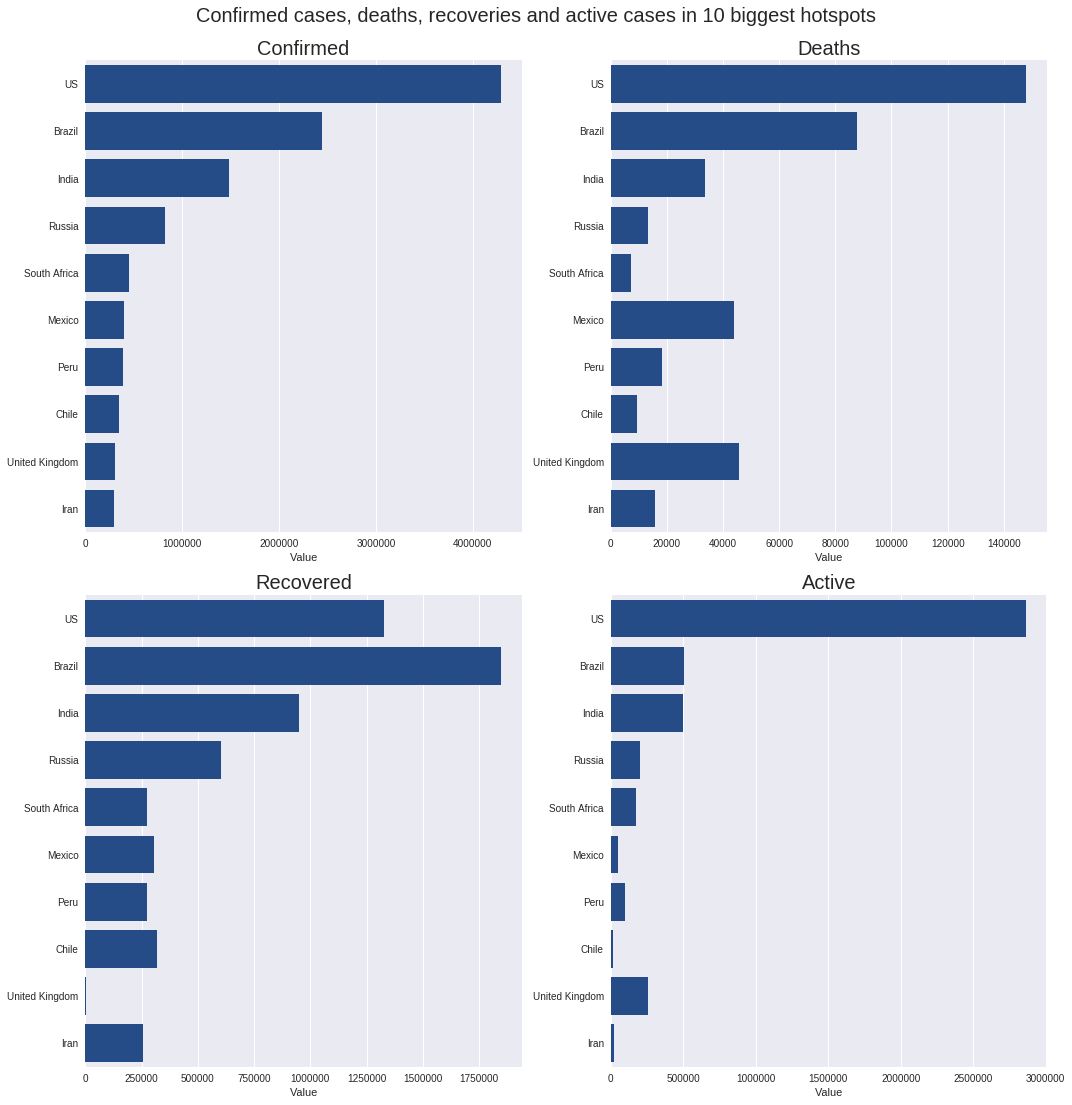

In [569]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(15,15))
plt.suptitle('Confirmed cases, deaths, recoveries and active cases in 10 biggest hotspots', fontsize=20,y=1.02)
columns = top10.columns

for i in range(0,4):
    ax = fig.add_subplot(2,2,i+1)
    sns.barplot(x=columns[i], y=top10.index,data=top10, color='#164897')
    plt.title(columns[i],fontsize=20)
    plt.ylabel('')
    plt.xlabel('Value') 
    
plt.tight_layout()